# 1. Set Up

## 1.1 Load Libraries

Import all common modules.

In [1039]:
# Data analysis libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
from IPython.display import display
pd.options.display.max_columns = None

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("Set1")

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import plotly.tools as tls

init_notebook_mode(connected=True) #do not miss this line

# ML libraries
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score

## 1.2 Load Data

Import the dataset. 

In [1040]:
# Read it
data_raw = pd.read_csv('../input/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Copy it
data = data_raw.copy()

# Peep it
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## 1.3 Overview of Data

A quick summary of the data.

In [1041]:
# Numeric columns
num_data = data.select_dtypes("int")
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
Age                         1470 non-null int64
DailyRate                   1470 non-null int64
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobSatisfaction             1470 non-null int64
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
PercentSalaryHike           1470 non-null int64
PerformanceRating           1470 non-null int64
RelationshipSatisfaction    1470 non-null int64
StandardHours               1470 non-null int64
StockOptionLevel            1

In [1042]:
# Non-numeric columns
obj_data = data.select_dtypes(exclude=["int"])
obj_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
Attrition         1470 non-null object
BusinessTravel    1470 non-null object
Department        1470 non-null object
EducationField    1470 non-null object
Gender            1470 non-null object
JobRole           1470 non-null object
MaritalStatus     1470 non-null object
Over18            1470 non-null object
OverTime          1470 non-null object
dtypes: object(9)
memory usage: 103.4+ KB


In [1043]:
# Print the unique values of columns with "object" dtype
for col in obj_data:
    print(col, ":", obj_data[col].unique())

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
Over18 : ['Y']
OverTime : ['Yes' 'No']


> *Of interest is that `BusinessTravel` and `MaritalStatus` have inherent ordering to their levels while the other variables do not.*

# 2. Data Preparation for Analysis

## 2.1 Encode Categorical Variables

In [1044]:
# Convert 'object' to 'category' 
data[data.select_dtypes(['object']).columns] = data.select_dtypes(['object']).apply(lambda x: x.astype('category'))

## 2.2 Reorder Categorical Variables

In [1045]:
# Provide the correct order of categories
data['BusinessTravel'] = data['BusinessTravel'].cat.reorder_categories(['Non-Travel', 'Travel_Rarely','Travel_Frequently'])

# 3. Exploratory Analysis

## 3.1 Overview of Numeric Features

### 3.1.1 Numeric Feature Distribution

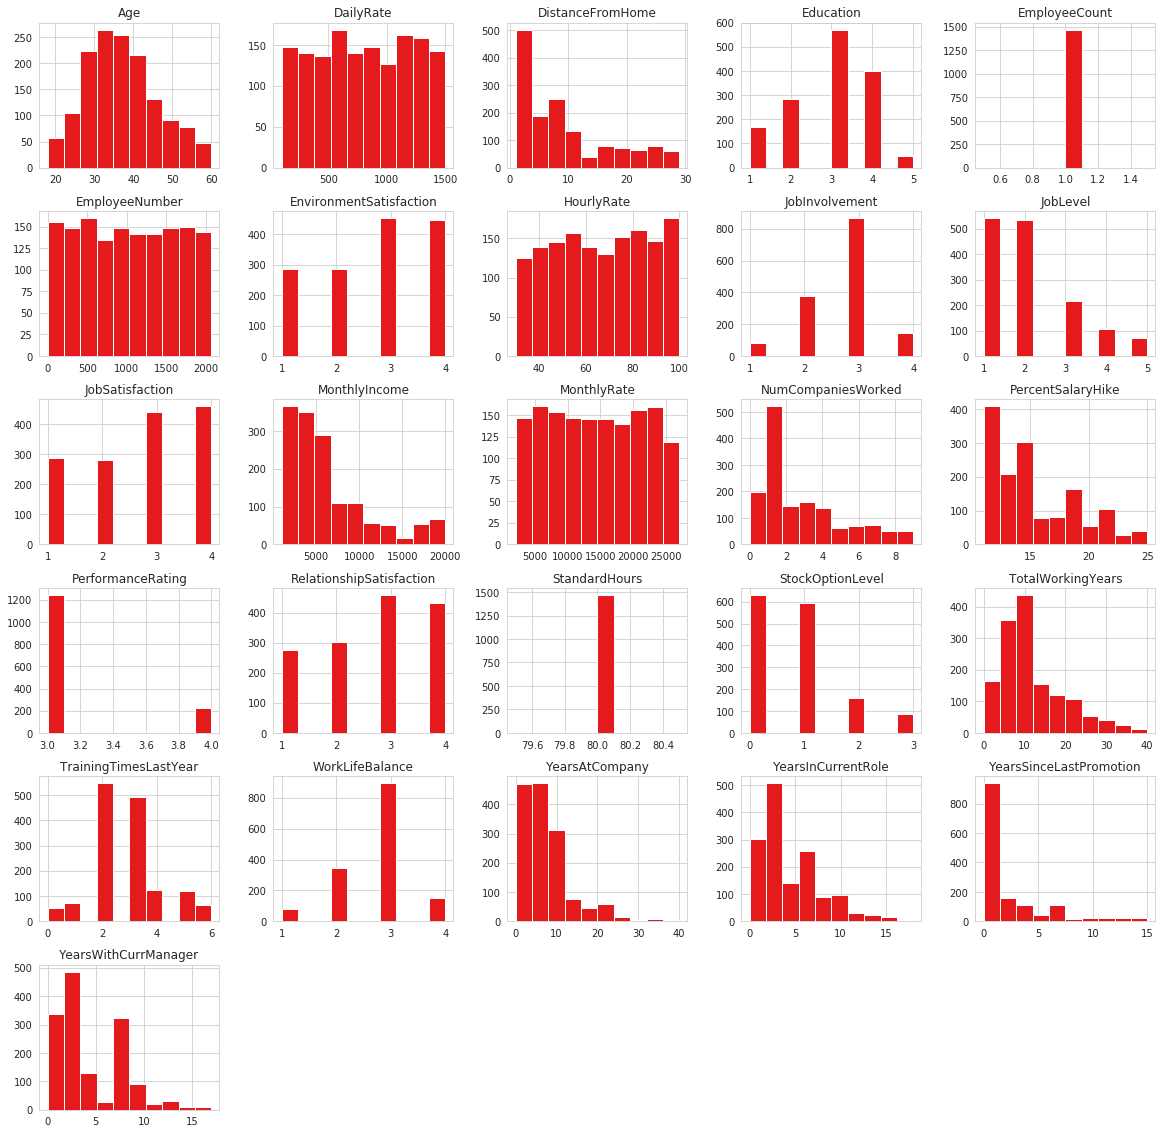

In [1046]:
# Plot counts for all numeric features
data.hist(figsize=(20,20))
plt.show()

* **Non-Useful Data:** `EmployeeCount` & `StandardHours` are constant values and `EmployeeNumber` is simply a unique identifier. They are of no use for modeling purposes.
* **Non-Normal Distributions:** Many of the variables are skewed to the right such as `MonthlyIncome`, `JobLevel`, and `DistanceFromHome`. Transform these columns to a normal distribution for modeling purposes. 

### 3.1.1 How many employees have left the company?

In [1047]:
# Attrition distribution
print("Percentage of Current Employees = {:.1f}%".format(
    data[data['Attrition'] == 'No'].shape[0] / data.shape[0]*100))

print("Percentage of Former Employees = {:.1f}%".format(
    data[data['Attrition'] == 'Yes'].shape[0] / data.shape[0]*100))

# Count & Percent by Attrition
grouped = data[['Attrition']].groupby(["Attrition"])
output = pd.DataFrame()
output['n'] = grouped["Attrition"].count()
output.reset_index(inplace=True)

# Sort in ascending order for plotting
output = output.sort_values('n', ascending=True)

# Plotly object: Attrition Counts
p = [go.Bar(x = output.Attrition, 
            y = output.n, 
            text=output.n,
            textposition = 'outside',
            orientation = 'v',
            opacity=0.6, 
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5)))]

# Pieces of Flair
layout = go.Layout(title='Attrition Count')
fig = go.Figure(data=p, layout=layout)

py.offline.iplot(fig)

Percentage of Current Employees = 83.9%
Percentage of Former Employees = 16.1%


> *237 out of 1470 employees have left the company which is about 16%.*

### 3.1.2 How many employees have left by department? 

In [1048]:
# Attrition by Department
grouped = data.groupby(["Department","Attrition"])
output = pd.DataFrame()
output['n'] = grouped["Attrition"].count()

# Identifying sub-categories within cohorts
output['pct'] = output['n'].groupby("Department").transform(lambda x: x/x.sum())

# Reset index 
output = output.reset_index()

# Filter for only employees who have left 
output_yes = output[output["Attrition"] == "Yes"]

# Sort in ascending order for plotting
output_yes = output_yes.sort_values('n', ascending=True)

# Plotly object: Attrition Count by Dept
p = [go.Bar(x = output_yes.Department, 
            y = output_yes.n, 
            text=output_yes.n,
            textposition = 'outside',
            orientation = 'v',
            opacity=0.6, 
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5)))]

# Pieces of Flair
layout = go.Layout(title='Attrition Count by Dept')
fig = go.Figure(data=p, layout=layout)

# Plot it
py.offline.iplot(fig)

> *R&D has the highest overall numbers of employees who have left overall. But what about the percentages?*

### 3.1.3 What percent of employees have left by department? 

In [1049]:
# Sort in ascending order for plotting
output_yes = output_yes.sort_values('pct', ascending=True)

# Change decimal to integer for readability 
output_yes['pct'] = output_yes['pct'] * 100

# Plotly object: Attrition Count by Dept
p = [go.Bar(x = output_yes.Department, 
            y = output_yes.pct, 
            text=output_yes.pct.round(decimals=2),
            textposition = 'outside',
            orientation = 'v',
            opacity=0.6, 
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5)))]

# Pieces of Flair
layout = go.Layout(title='Attrition Rate by Department')
fig = go.Figure(data=p, layout=layout)

# Plot it
py.offline.iplot(fig)

> *Although R&D has the highest number of employees who have left, it still has the lowest attrition rate of all departments.*

### 3.1.4 Which job roles have the highest attrition by percent? 

In [1050]:
# Attrition by Department
grouped = data.groupby(["Department","JobRole","Attrition"])
output = pd.DataFrame()
output['n'] = grouped["Attrition"].count()

# Identifying sub-categories within cohorts
output['pct'] = output['n'].groupby("JobRole").transform(lambda x: x/x.sum())

# Reset index 
output = output.reset_index()

# Filter for only employees who have left 
output_yes = output[output["Attrition"] == "Yes"]

# Replace long dept names with acronyms
output_yes['Department'] = output_yes['Department'].str.replace('Research & Development', "R&D", case=False)
output_yes['Department'] = output_yes['Department'].str.replace('Human Resources', "HR", case=False)

# Add column with combined dept & job role
output_yes['dept_jobrole'] = output_yes['Department'].str.cat(output_yes[['JobRole']], sep=' : ')

# Sort in ascending order for plotting
output_yes = output_yes.sort_values('pct', ascending=True)

# Change decimal to integer for readability 
output_yes['pct'] = output_yes['pct'] * 100

# Plotly object: Attrition Count by Dept
p = [go.Bar(x = output_yes.dept_jobrole, 
            y = output_yes.pct,
            text=output_yes.pct.round(decimals=2),
            textposition = 'outside',
            orientation = 'v',
            opacity=0.6, 
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5)))]

# Pieces of Flair
layout = go.Layout(title='Attrition Rate by Job Role',
                   yaxis=dict(title="Percent"),
                   margin = dict(b = 120
  ))
fig = go.Figure(data=p, layout=layout)

# Plot it
py.offline.iplot(fig)

> *The Sales Representative role has the highest turnover rate, followed by Laboratory Technician and Human Resources.*

## 3.2 Overview of Categorical Features

### 3.2.1 How many employees who left traveled for business? 

In [1051]:
# Attrition by Department
grouped = data.groupby(['BusinessTravel',"Attrition"])
output = pd.DataFrame()
output['n'] = grouped["Attrition"].count()

# Identifying sub-categories within cohorts
output['pct'] = output['n'].groupby("BusinessTravel").transform(lambda x: x/x.sum())

# Reset index
output = output.reset_index()

# Filter for only employees who have left
output_yes = output[output['Attrition'] == "Yes"]

# Change decimal to integer for readability 
output_yes['pct'] = output_yes['pct'] * 100

# Plotly object: Attrition Count by Amount of Travel
p = [go.Bar(x = output_yes.BusinessTravel, 
            y = output_yes.n,
            text=output_yes.n.round(decimals=2),
            textposition = 'outside',
            orientation = 'v',
            opacity=0.6, 
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5)))]

# Pieces of Flair
layout = go.Layout(title='Business Travel vs Attrition Count',
                   yaxis=dict(title="Count"))
fig = go.Figure(data=p, layout=layout)

# Plot it
py.offline.iplot(fig)

> *The highest total number of employees who left the company were those who traveled rarely. But what about the percentages?*

### 3.2.2 What percent of employees who left traveled for business? 

In [1052]:
# Plotly object: Attrition Pct by Amount of Travel
p = [go.Bar(x = output_yes.BusinessTravel, 
            y = output_yes.pct,
            text=output_yes.pct.round(decimals=2),
            textposition = 'outside',
            orientation = 'v',
            opacity=0.6, 
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5)))]

# Pieces of Flair
layout = go.Layout(title='Business Travel vs Attrition Rate',
                   yaxis=dict(title="Percent"))
fig = go.Figure(data=p, layout=layout)

# Plot it
py.offline.iplot(fig)

> *Almost 1/4 of employees who travel frequently end up leaving the company.*

### 3.2.3 How many employees who left worked overtime? 

In [1053]:
# Attrition by Department
grouped = data.groupby(['OverTime',"Attrition"])
output = pd.DataFrame()
output['n'] = grouped["Attrition"].count()

# Identifying sub-categories within cohorts
output['pct'] = output['n'].groupby("OverTime").transform(lambda x: x/x.sum())

# Reset index
output = output.reset_index().sort_values('n', ascending=False)

# Filter for only employees who have left
output_yes = output[output['Attrition'] == "Yes"]

# Change decimal to integer for readability 
output_yes['pct'] = output_yes['pct'] * 100

# Plotly object: Attrition Count by Amount of Travel
p = [go.Bar(x = output_yes.OverTime, 
            y = output_yes.n,
            text=output_yes.n.round(decimals=2),
            textposition = 'outside',
            orientation = 'v',
            opacity=0.6, 
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5)))]

# Pieces of Flair
layout = go.Layout(title='OverTime vs Attrition Count',
                   yaxis=dict(title="Count"))
fig = go.Figure(data=p, layout=layout)

# Plot it
py.offline.iplot(fig)

> *The number of employees who left that worked overtime is about the same as those who did not work overtime. But what about the percentages?*

### 3.2.4 What percent of employees who left worked overtime? 

In [1054]:
# Plotly object: Attrition Count by Amount of Travel
p = [go.Bar(x = output_yes.OverTime, 
            y = output_yes.pct,
            text=output_yes.pct.round(decimals=2),
            textposition = 'outside',
            orientation = 'v',
            opacity=0.6, 
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5)))]

# Pieces of Flair
layout = go.Layout(title='OverTime vs Attrition Rate',
                   yaxis=dict(title="Percent"))
fig = go.Figure(data=p, layout=layout)

# Plot it
py.offline.iplot(fig)

> *Employees who worked overtime are almost three times as likely to leave as those who did not work overtime.*

In [1055]:
obj_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
Attrition         1470 non-null object
BusinessTravel    1470 non-null object
Department        1470 non-null object
EducationField    1470 non-null object
Gender            1470 non-null object
JobRole           1470 non-null object
MaritalStatus     1470 non-null object
Over18            1470 non-null object
OverTime          1470 non-null object
dtypes: object(9)
memory usage: 103.4+ KB


## 3.3 Correlation with Target

Visualize the pairwise relationships between `Attrition` and other numeric features.

In [1056]:
# Make a temporary copy 
df_temp = data.copy()

# Convert target variable from category to integer 
df_temp['Attrition'] = df_temp['Attrition'].apply(lambda x: 0 if x == 'No' else 1).astype('int')

# Drop non-useful columns
df_temp = df_temp.drop(
    ['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)

# Create a correlation matrix
corr_metrics = df_temp.corr().round(decimals=3)

print('Most Positive Correlations: \n\n', corr_metrics['Attrition'].sort_values().tail(5))
print('\nMost Negative Correlations: \n\n', corr_metrics['Attrition'].sort_values().head(5))

corr_metrics.style.background_gradient(cmap='Blues')

Most Positive Correlations: 

 PerformanceRating     0.003
MonthlyRate           0.015
NumCompaniesWorked    0.043
DistanceFromHome      0.078
Attrition             1.000
Name: Attrition, dtype: float64

Most Negative Correlations: 

 TotalWorkingYears    -0.171
JobLevel             -0.169
YearsInCurrentRole   -0.161
MonthlyIncome        -0.160
Age                  -0.159
Name: Attrition, dtype: float64


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1,-0.159,0.011,-0.002,0.208,0.01,0.024,0.03,0.51,-0.005,0.498,0.028,0.3,0.004,0.002,0.054,0.038,0.68,-0.02,-0.021,0.311,0.213,0.217,0.202
Attrition,-0.159,1,-0.057,0.078,-0.031,-0.103,-0.007,-0.13,-0.169,-0.103,-0.16,0.015,0.043,-0.013,0.003,-0.046,-0.137,-0.171,-0.059,-0.064,-0.134,-0.161,-0.033,-0.156
DailyRate,0.011,-0.057,1,-0.005,-0.017,0.018,0.023,0.046,0.003,0.031,0.008,-0.032,0.038,0.023,0,0.008,0.042,0.015,0.002,-0.038,-0.034,0.01,-0.033,-0.026
DistanceFromHome,-0.002,0.078,-0.005,1,0.021,-0.016,0.031,0.009,0.005,-0.004,-0.017,0.027,-0.029,0.04,0.027,0.007,0.045,0.005,-0.037,-0.027,0.01,0.019,0.01,0.014
Education,0.208,-0.031,-0.017,0.021,1,-0.027,0.017,0.042,0.102,-0.011,0.095,-0.026,0.126,-0.011,-0.025,-0.009,0.018,0.148,-0.025,0.01,0.069,0.06,0.054,0.069
EnvironmentSatisfaction,0.01,-0.103,0.018,-0.016,-0.027,1,-0.05,-0.008,0.001,-0.007,-0.006,0.038,0.013,-0.032,-0.03,0.008,0.003,-0.003,-0.019,0.028,0.001,0.018,0.016,-0.005
HourlyRate,0.024,-0.007,0.023,0.031,0.017,-0.05,1,0.043,-0.028,-0.071,-0.016,-0.015,0.022,-0.009,-0.002,0.001,0.05,-0.002,-0.009,-0.005,-0.02,-0.024,-0.027,-0.02
JobInvolvement,0.03,-0.13,0.046,0.009,0.042,-0.008,0.043,1,-0.013,-0.021,-0.015,-0.016,0.015,-0.017,-0.029,0.034,0.022,-0.006,-0.015,-0.015,-0.021,0.009,-0.024,0.026
JobLevel,0.51,-0.169,0.003,0.005,0.102,0.001,-0.028,-0.013,1,-0.002,0.95,0.04,0.143,-0.035,-0.021,0.022,0.014,0.782,-0.018,0.038,0.535,0.389,0.354,0.375
JobSatisfaction,-0.005,-0.103,0.031,-0.004,-0.011,-0.007,-0.071,-0.021,-0.002,1,-0.007,0.001,-0.056,0.02,0.002,-0.012,0.011,-0.02,-0.006,-0.019,-0.004,-0.002,-0.018,-0.028


> *If features have strong correlations with each other, then they may be considered redundant such as* `JobLevel` *and* `MonthlyIncome`.

# 4. Data Preparation for Machine Learning

## 4.1 Drop Variables

Remove known non-useful variables. 

In [1057]:
# Drop non-useful variables
data.drop(['EmployeeCount', 'EmployeeNumber',
            'StandardHours', 'Over18'], axis=1, inplace=True)

# Drop highly-correlated redundant variables
data = data.drop(['MonthlyIncome'], axis=1)

## 4.2 Encode Categorical Variables

Encode categorical labels that have two or less labels to numeric values using `LabelEncoder`. 

In [1058]:
# Load encoder from Sci-kit Learn 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Create a label encoder object
le = LabelEncoder()

# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in data.columns[1:]:
    if data[col].dtype != 'int64':
        if len(list(data[col].unique())) <= 2:
            le.fit(data[col])
            data[col] = le.transform(data[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

3 columns were label encoded.


## 4.3 Create Dummy Variables

Convert nominal values using the `Pandas` dummies method. 

In [1059]:
# Turn categorical variables into dummy variables
data_ml = pd.get_dummies(data, 
                      drop_first=True) # Avoid dummy trap

data_ml.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Rarely,BusinessTravel_Travel_Frequently,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,4,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,3,1,61,2,2,2,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,3,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,3,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,2,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


## 4.4 Train-Test-Split

Split data into training and testing sets. 

In [1060]:
from sklearn.model_selection import train_test_split

# Choose the dependent variable column (churn) and set it as target
target = data_ml['Attrition']

# Drop column churn and set everything else as features
features = data_ml.drop("Attrition",axis=1)

# Use that function to create the splits both for target and for features
# Set the test sample to be 25% of your observations
train_labels, test_labels, \
train_features, test_features = train_test_split(target,
                                                 features,
                                                 test_size=0.25,
                                                 random_state=42)

# Check shape of the data
print("Shape of Train Features: ", train_features.shape) 
print("Shape of Train Labels: ", train_labels.shape) 
print("Shape of Test Features: ", test_features.shape) 
print("Shape of Test Labels: ", test_labels.shape) 


Shape of Train Features:  (1102, 43)
Shape of Train Labels:  (1102,)
Shape of Test Features:  (368, 43)
Shape of Test Labels:  (368,)


# 5. Machine Learning

## 5.1 Set Up

### 5.1.1 Class Imbalance

The data is imbalanced with 16% or about 237 out of 1470 employees having left the company. This means that the accuracy of models will most likely be driven more by their ability to classify non-leavers than actual leavers unless the data is balanced. Unfortunately, balancing the classes will reduce the size of the dataset substantially. 

### 5.1.2 Precision vs Recall

Higher precision means that an algorithm classified more churners than non-churners. 
- Precision measures the rate of false positives or *incorrectly predicted stayers*

Higher recall means that an algorithm found more of the churners than non-churners.
- Recall measures the rate of false negatives or *correctly predicted leavers*

> *Although both are important, in a business context, a higher recall score is typically more important than the precision score. It is generally better to give up some false positives (incorrectly targeted stayers) in order to gain some false negatives (correctly predicted quitters) because false negatives typically cost the company more money.*

## 5.2 Unbalanced Classes

In [1061]:
# Import decision tree 
from sklearn.tree import DecisionTreeClassifier

# Train our decision tree
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)

# Predict the labels for the test data
tree_predictions = tree.predict(test_features)

# Create the classification report 
from sklearn.metrics import classification_report
class_rep_tree = classification_report(test_labels, tree_predictions)

# Print summary
print("Unbalanced")
print("=" * 80)
print("Decision Tree: \n", class_rep_tree)
print("Decision Tree Accuracy score: {}".format(accuracy_score(test_labels, tree_predictions)), "\n")

#####

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Train our logistic regression and predict labels for the test set
logreg = LogisticRegression(random_state=10)
logreg.fit(train_features, train_labels)
logreg_predictions = logreg.predict(test_features)

# Create the classification report
class_rep_log = classification_report(test_labels, logreg_predictions)

# Print summary
print("Logistic Regression: \n", class_rep_log)
print("Logistic Regression Accuracy score: {}".format(accuracy_score(test_labels, logreg_predictions)))

Unbalanced
Decision Tree: 
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       320
           1       0.22      0.31      0.26        48

   micro avg       0.76      0.76      0.76       368
   macro avg       0.55      0.57      0.56       368
weighted avg       0.80      0.76      0.78       368

Decision Tree Accuracy score: 0.7635869565217391 

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       320
           1       0.64      0.44      0.52        48

   micro avg       0.89      0.89      0.89       368
   macro avg       0.78      0.70      0.73       368
weighted avg       0.88      0.89      0.89       368

Logistic Regression Accuracy score: 0.8940217391304348


> *In both models, non-churners are fairly well classified but churners are disproportionately misclassified. This means the accuracy of both models is driven more by their ability to classify non-churners than actual churners.*

## 5.2 Balanced Classes

In [1062]:
##### Data Preparation #####

# Subset only the churners
yes_only = data_ml.loc[data_ml['Attrition'] == 1]

# Sample the non-churners to be the same number as there are churners
no_only = data_ml.loc[data_ml['Attrition'] == 0].sample(len(yes_only), random_state=10)

# Concatenate the dataframes no_only and yes_only
attrition_bal = pd.concat([yes_only, no_only])

# Choose the dependent variable column (churn) and set it as target
target = attrition_bal['Attrition']

# Drop column churn and set everything else as features
features = attrition_bal.drop("Attrition",axis=1)

# Use that function to create the splits both for target and for features
# Set the test sample to be 25% of your observations
train_labels, test_labels, \
train_features, test_features = train_test_split(target,
                                                 features,
                                                 test_size=0.25,
                                                 random_state=42)

# Check shape of the data
print("Shape of Train Features: ", train_features.shape) 
print("Shape of Train Labels: ", train_labels.shape) 
print("Shape of Test Features: ", test_features.shape) 
print("Shape of Test Labels: ", test_labels.shape) 

Shape of Train Features:  (355, 43)
Shape of Train Labels:  (355,)
Shape of Test Features:  (119, 43)
Shape of Test Labels:  (119,)


In [1063]:
##### Decision Tree Model #####

# Train our decision tree on the balanced data
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)

# Predict the labels for the test data
tree_predictions = tree.predict(test_features)

print("Balanced")
print("=" * 80)
print("Decision Tree: \n", classification_report(test_labels, tree_predictions))

# Accuracy score of the prediction for the training set
print("Training Set Accuracy: ", tree.score(train_features,train_labels)*100)

# Accuracy score of the prediction for the test set
print("Testing Set Accuracy: ", tree.score(test_features,test_labels)*100, "\n")

##### Logistic Regression Model #####

# Train our logistic regression on the balanced data
logreg = LogisticRegression(random_state=10)
logreg.fit(train_features, train_labels)
pred_labels_logit = logreg.predict(test_features)

# Compare the balanced data models
print("Logistic Regression: \n", classification_report(test_labels, pred_labels_logit))

# Accuracy score of the prediction for the training set
print("Training Set Accuracy: ", logreg.score(train_features,train_labels)*100)

# Accuracy score of the prediction for the test set
print("Testing Set Accuracy: ", logreg.score(test_features,test_labels)*100)

Balanced
Decision Tree: 
               precision    recall  f1-score   support

           0       0.64      0.63      0.64        60
           1       0.63      0.64      0.64        59

   micro avg       0.64      0.64      0.64       119
   macro avg       0.64      0.64      0.64       119
weighted avg       0.64      0.64      0.64       119

Training Set Accuracy:  100.0
Testing Set Accuracy:  63.86554621848739 

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.75      0.73      0.74        60
           1       0.73      0.75      0.74        59

   micro avg       0.74      0.74      0.74       119
   macro avg       0.74      0.74      0.74       119
weighted avg       0.74      0.74      0.74       119

Training Set Accuracy:  76.05633802816901
Testing Set Accuracy:  73.94957983193278


> *If the data is balanced, then the bias towards the prevalent class is removed.*

## 5.3 Cross Validation

Use K-Fold cross validation to get a sense of the actual performance of the model. 

In [1064]:
# Import modules
from sklearn.model_selection import KFold, cross_val_score

# Set up our K-fold cross-validation
kf = KFold(n_splits=20, random_state=10)

# Train our models using KFold cv
tree_score = cross_val_score(tree, features, target, cv=kf)
logit_score = cross_val_score(logreg, features, target, cv=kf)

# Print the mean of each array of scores
print("Decision Tree:", np.mean(tree_score), "Logistic Regression:", np.mean(logit_score))

Decision Tree: 0.5569746376811594 Logistic Regression: 0.6896739130434782


## 5.4 Other Models

### 5.4.1 Random Forest

In [1065]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score

rfc_model = RFC(n_estimators=100, random_state=42, max_depth=11, max_features=11).fit(train_features, train_labels)
rfc_prediction = rfc_model.predict(test_features)
rfc_score = accuracy_score(test_labels, rfc_prediction)

# Check performance 
print("Balanced")
print("=" * 80)
print("Random Forest:\n", classification_report(test_labels, rfc_prediction))

# Set up our K-fold cross-validation
kf = KFold(n_splits=20, random_state=10)

# Train our models using KFold cv
rfc_score_cv = cross_val_score(rfc_model, features, target, cv=kf)

# Print the accuracy
print("Accuracy: ", rfc_score)

# Print the mean  
print("Cross Validation Mean Score:", np.mean(rfc_score_cv))

Balanced
Random Forest:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76        60
           1       0.77      0.69      0.73        59

   micro avg       0.75      0.75      0.75       119
   macro avg       0.75      0.75      0.75       119
weighted avg       0.75      0.75      0.75       119

Accuracy:  0.7478991596638656
Cross Validation Mean Score: 0.650090579710145


### 5.4.2 ADA Boost

In [1066]:
from sklearn.ensemble import AdaBoostClassifier as ABC

ada_model = ABC(n_estimators=100, random_state=42, learning_rate=.80).fit(train_features, train_labels)
ada_prediction = ada_model.predict(test_features)
ada_score = accuracy_score(test_labels, ada_prediction)

# Train our models using KFold cv
ada_score_cv = cross_val_score(ada_model, features, target, cv=kf)

# Check performance 
print("Balanced")
print("=" * 80)
print("ADA Boost:\n", classification_report(test_labels, ada_prediction))

# Print the accuracy
print("Accuracy: ", ada_score)

# Print the CV mean  
print("Cross Validation Mean Score:", np.mean(ada_score_cv))

Balanced
ADA Boost:
               precision    recall  f1-score   support

           0       0.79      0.80      0.79        60
           1       0.79      0.78      0.79        59

   micro avg       0.79      0.79      0.79       119
   macro avg       0.79      0.79      0.79       119
weighted avg       0.79      0.79      0.79       119

Accuracy:  0.7899159663865546
Cross Validation Mean Score: 0.6768115942028985


### 5.4.3 H2O AutoML

In [1067]:
# Import libraries
import h2o
from h2o.automl import H2OAutoML

# Initiate instance
h2o.init()

# Convert data to h2o data frame 
df = h2o.H2OFrame(data.copy())

# Split data 
train, valid, test = df.split_frame(ratios=[0.7,0.15], seed=1234)

# Set target variable
response = "Attrition"

# Set target to categorical
train[response] = train[response].asfactor()
valid[response] = valid[response].asfactor()
test[response] = test[response].asfactor()

# Non-target features
predictors = df.columns[:-1]

print("Number of rows in train, valid and test set : ", train.shape[0], valid.shape[0], test.shape[0])

# Set AutoML parameters
aml = H2OAutoML(max_models = 10, 
                max_runtime_secs=300, 
                seed = 1234)

# Train multiple models
aml.train(x=predictors, 
          y=response, 
          training_frame=train, 
          validation_frame=valid)

# Check leaderboard
lb = aml.leaderboard
print(lb.head())

# Generate predictions on a test set 
#preds = aml.leader.predict(test)

#metalearner = h2o.get_model(aml.leader.metalearner()['name'])
#metalearner.std_coef_plot()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,5 hours 21 mins
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.2
H2O cluster version age:,1 month and 11 days
H2O cluster name:,H2O_from_python_unknownUser_5w8a9e
H2O cluster total nodes:,1
H2O cluster free memory:,2.732 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Number of rows in train, valid and test set :  1040 219 211
AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20190528_230306,0.829503,0.313018,0.24574,0.302524,0.0915208
StackedEnsemble_AllModels_AutoML_20190528_230306,0.828103,0.313751,0.246822,0.302607,0.0915712
GLM_grid_1_AutoML_20190528_230306_model_1,0.825967,0.333388,0.232657,0.309433,0.0957487
XGBoost_3_AutoML_20190528_230306,0.804912,0.34437,0.263185,0.31914,0.10185
GBM_1_AutoML_20190528_230306,0.802015,0.355576,0.24263,0.322062,0.103724
GBM_5_AutoML_20190528_230306,0.800652,0.358605,0.29645,0.328434,0.107869
XGBoost_1_AutoML_20190528_230306,0.799615,0.345522,0.253584,0.31904,0.101786
XGBoost_2_AutoML_20190528_230306,0.798746,0.357112,0.279108,0.326858,0.106836
GBM_2_AutoML_20190528_230306,0.787481,0.359337,0.296687,0.32503,0.105645
GBM_3_AutoML_20190528_230306,0.784746,0.35844,0.278905,0.322573,0.104053
